In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
digits = load_digits()
digits.data.shape
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

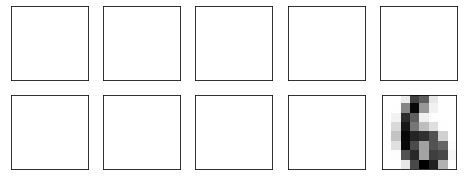

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
 axi.set(xticks=[], yticks=[])
axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)

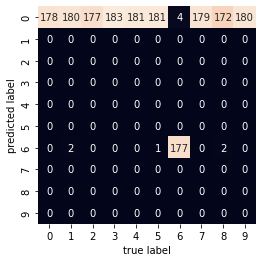

In [6]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=digits.target_names,
yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [8]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.19254312743461324